In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# ================== STEP 2: LOAD THE DATASETS ==================
df = pd.read_csv('fuel_consumption_dataset.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

print("\n=== MISSING VALUES (FUEL) ===")
print(df.isnull().sum())

print("\n=== UNIQUE VALUES PER COLUMN (FUEL) ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Dataset Shape: (1067, 13)

First 5 rows:
   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                      

In [3]:
feature_columns = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
                    'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']
target_column = 'CO2EMISSIONS'

X = df[feature_columns]
y = df[target_column]

In [4]:
X.shape

(1067, 7)

In [5]:
# ================== STEP 5: TRAIN-TEST SPLIT ==================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# ================== STEP 6: MODEL TRAINING ==================
from sklearn.linear_model import LinearRegression


model_fuel = LinearRegression()


model_fuel.fit(X_train, y_train)

LinearRegression()

In [7]:
# ================== STEP 7: MODEL PREDICTION ==================
y_pred = model_fuel.predict(X_test)

In [8]:

r2 = r2_score(y_test, y_pred)

# Print all metrics nicely
print(f"R² Score: {r2:.4f}")

R² Score: 1.0000


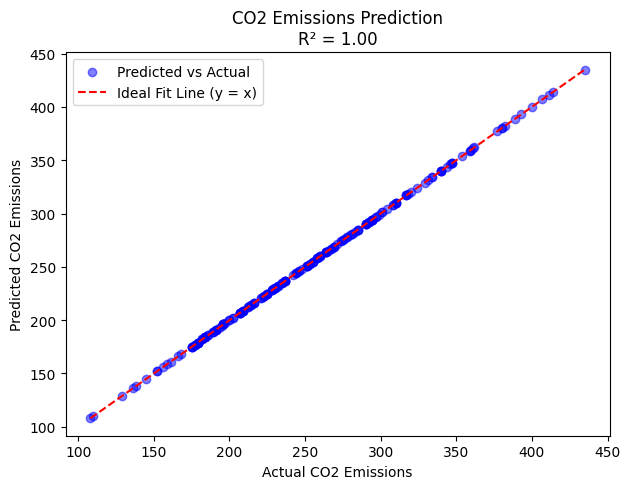

In [9]:
# ================== STEP 9: PLOTTING ==================
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot 1: CO2 Emissions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit Line (y = x)')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title(f'CO2 Emissions Prediction\nR² = {r2:.2f}')
plt.legend()

plt.tight_layout()
plt.show()
